In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/admin/stock_market_pred/Stock_Price_Prediction.csv")

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [7]:
X = data[['High','Low','Open','Volume']].values
y = data['Close'].values

In [9]:
X

array([[2.50000000e+01, 1.75400010e+01, 1.90000000e+01, 1.87663000e+07],
       [3.04200000e+01, 2.32999990e+01, 2.57900010e+01, 1.71871000e+07],
       [2.59200000e+01, 2.02700000e+01, 2.50000000e+01, 8.21880000e+06],
       ...,
       [6.50880005e+02, 6.18000000e+02, 6.32419983e+02, 2.90057000e+07],
       [6.53000000e+02, 6.32520020e+02, 6.40000000e+02, 1.57193000e+07],
       [7.86140015e+02, 6.73520020e+02, 6.73690002e+02, 4.70650000e+07]])

In [11]:
y

array([ 23.889999,  23.83    ,  21.959999, ..., 640.809998, 650.570007,
       780.      ])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [13]:
regressor = LinearRegression()

In [14]:
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
print(regressor.coef_)

[ 8.82000705e-01  7.40143446e-01 -6.23514690e-01 -1.14306384e-08]


In [16]:
print(regressor.intercept_)

-0.024151989032958454


In [17]:
predicted = regressor.predict(X_test)

In [18]:
print(predicted)

[ 29.79325269 235.28583478 364.63699319  24.96496935 247.81602835
 337.24496418 221.91253707 204.78394408 211.48694208 295.26910433
 381.80408679  35.00728995 369.02345057  30.97371213 278.87630306
 256.9967241   25.90031616  37.65971688 181.16509206  31.40798898
 252.27428919 286.06423329  32.36446418  21.3594546   16.80086112
 341.10141833 232.50250486  33.89064145 292.13884102  23.11594754
  30.35951966 341.93035234 354.76227375 247.53900917  29.55112806
 251.29513505 203.69159911 318.63238407 261.97374719  37.21529283
  34.05817311 197.51529097 413.76452452  25.0519831   16.78354601
  26.05099965  32.16660227 202.81990272 189.58768178  34.85439954
 253.17564521 250.28715986 227.27938289 247.97106389 336.60468152
 211.61845639 245.32072412 208.37133354 205.86069494  31.11842162
 178.59538054 326.75841113 307.76032081  29.47196817 274.85280057
 209.12277515  34.00546927 146.15722256  24.02344158 300.44272766
 313.54454405  32.06737382  83.22023411 188.69398117 228.32602299
 199.49759

In [19]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [20]:
data1.head(20)

,Actual,Predicted
0,29.940001,29.793253
1,235.839996,235.285835
2,362.750000,364.636993
3,24.740000,24.964969
4,250.029999,247.816028
5,334.850006,337.244964
6,222.600006,221.912537
7,203.759995,204.783944
8,209.600006,211.486942
9,294.790009,295.269104


In [21]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 1.4411086991820725
Mean Squared Error: 4.410972416858393
Root Mean Squared Error: 2.100231515061707


In [22]:
graph = data1.head(20)

<AxesSubplot:>

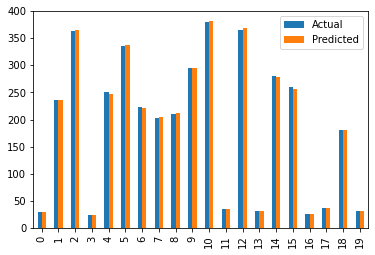

In [23]:
graph.plot(kind='bar')

In [24]:
print("thank you :)")

thank you :)
